# Plan Stage
- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem

- Understand your data in the problem context:
Before diving into any data analysis, it is important to understand the context of the data and what problem it is trying to address. In this case, the TikTok Google Play Store review dataset can help us understand how users feel about the TikTok app, what their complaints and praises are, and how the app can be improved to better serve its users. By understanding the context of the data, we can frame our analysis and conclusions in a way that is meaningful and relevant to the problem we are trying to solve.

- Consider how your data will best address the business need:
The TikTok Google Play Store review dataset can be used to address a variety of business needs related to the TikTok app. For example, the dataset can be used to identify common user complaints and issues, which can then be used to guide app development and improvements. Additionally, the dataset can be used to identify trends in user sentiment over time, which can help to track the success of app updates and marketing campaigns. By considering how the data can best address the business need, we can focus our analysis on the most relevant and impactful insights.

- Contextualize & understand the data and the problem:
Finally, it is important to contextualize and understand the data and the problem in order to draw meaningful insights. This involves understanding the data itself, as well as the context in which it was collected. In the case of the TikTok Google Play Store review dataset, we need to understand the limitations of the data, such as potential biases in the reviews, as well as the context in which the reviews were written (e.g. during a particular marketing campaign or app update). By contextualizing and understanding the data and the problem, we can draw more accurate and actionable insights from the data.

Overall, the TikTok Google Play Store review dataset can provide valuable insights into user sentiment and app performance, as long as we take the time to understand the context of the data and how it can best address the business need.

## Step 1. Imports
Import packages
Load dataset

In [28]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
import plotly.express as px
from collections import Counter
nltk.download('stopwords')
nltk.download('vader_lexicon')
stemmer = nltk.SnowballStemmer("english")



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Load data
df0 = pd.read_csv('/kaggle/input/tiktok-google-play-store-review/tiktok_google_play_reviews.csv')
print(df0.head())

                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables

### Gather basic information about the data

In [6]:
# Gather basic information about the data 
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              460287 non-null  object
 1   userName              460287 non-null  object
 2   userImage             460287 non-null  object
 3   content               460271 non-null  object
 4   score                 460287 non-null  int64 
 5   thumbsUpCount         460287 non-null  int64 
 6   reviewCreatedVersion  333953 non-null  object
 7   at                    460287 non-null  object
 8   replyContent          260 non-null     object
 9   repliedAt             260 non-null     object
dtypes: int64(2), object(8)
memory usage: 35.1+ MB


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
df0.describe()

score  thumbsUpCount
count  460287.000000  460287.000000
mean        4.234919       3.210601
std         1.430718     183.506791
min         1.000000       0.000000
25%         4.000000       0.000000
50%         5.000000       0.000000
75%         5.000000       0.000000
max         5.000000   40311.000000

### Check missing values

In [8]:
# Check for missing values
df0.isna().sum()

reviewId                     0
userName                     0
userImage                    0
content                     16
score                        0
thumbsUpCount                0
reviewCreatedVersion    126334
at                           0
replyContent            460027
repliedAt               460027
dtype: int64

There are many missing values in the data.

### Check duplicates

In [9]:
# Check for duplicates
df0.duplicated().sum()

0

There are not any duplicates

### Create new dataset for the analysis

Create a new dataset with "content" and "score" for the TikTok reviews sentiment analysis:

In [10]:
df = df0[["content", "score"]]
print(df.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


### Drop Rows Missing values

In [11]:
# Drop nulls
df = df.dropna()

### Prepare Data for analysis
To prepare the data for the sentiment analysis we clean the text in the content column

In [12]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["content"] = df["content"].apply(clean)

# Analyze Stage

In [14]:
# Plot the ratings percentages given to TikTok on the Google Play store

ratings = df["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

figure = px.pie(df, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

73.6% of users gave TikTok a five-star rating, while 13.5% gave it only one star. 

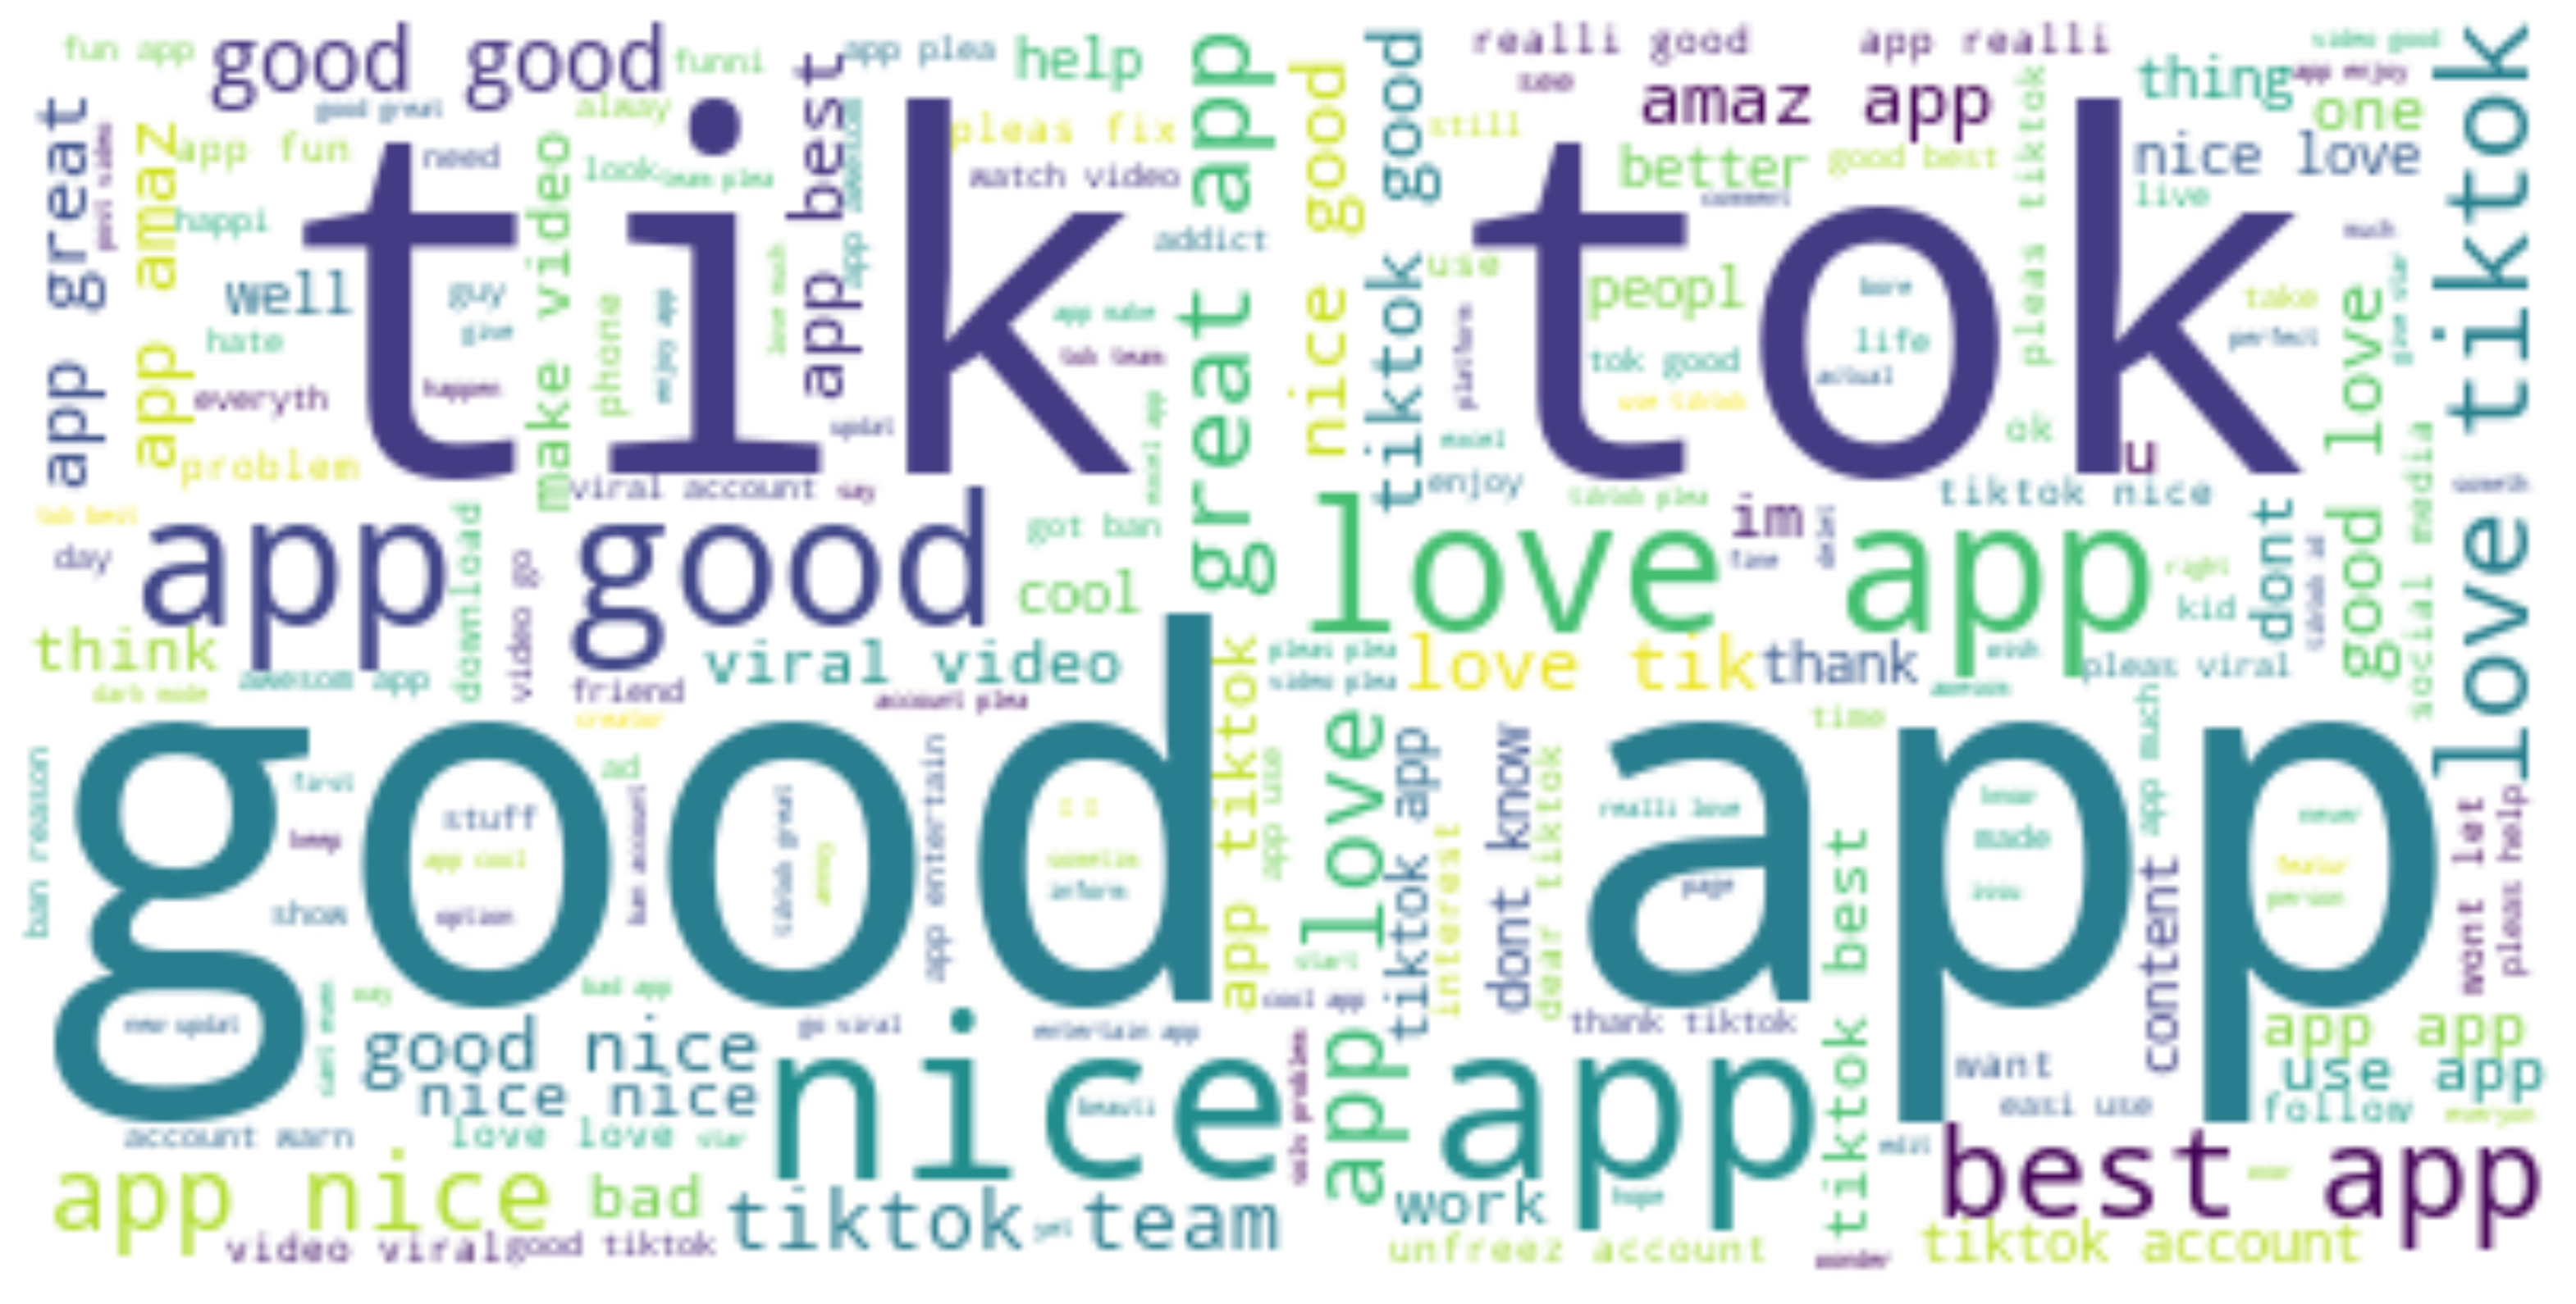

In [18]:
# Plot the words used by users in their TikTok reviews

text = " ".join(i for i in df.content)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(20,15), dpi=200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["content"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["content"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["content"]]
df = df[["content", "Positive", "Negative", "Neutral"]]
print(df.head())

                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


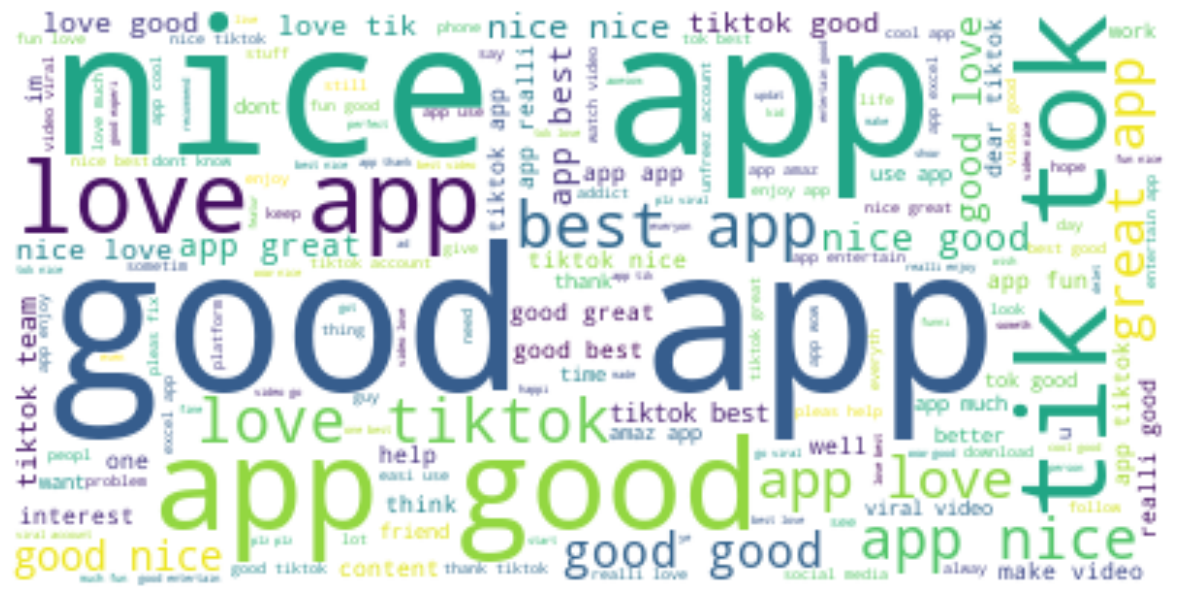

In [22]:
# Words people use in the positive reviews of TikTok

positive =' '.join([i for i in df['content'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Most common words used in positive reviews:
positive_words = [word for word in positive.lower().split() if word not in stopwords.words("english") and word.isalpha()]

most_common_words = Counter(positive_words).most_common(10)

print("Most common words used in positive reviews:")
for word, count in most_common_words:
    print(f"{word.capitalize()}: {count}")

Most common words used in positive reviews:
App: 96177
Good: 70981
Love: 47315
Nice: 45835
Tiktok: 36572
Like: 25249
Video: 22366
Best: 22147
Great: 19054
Fun: 13922


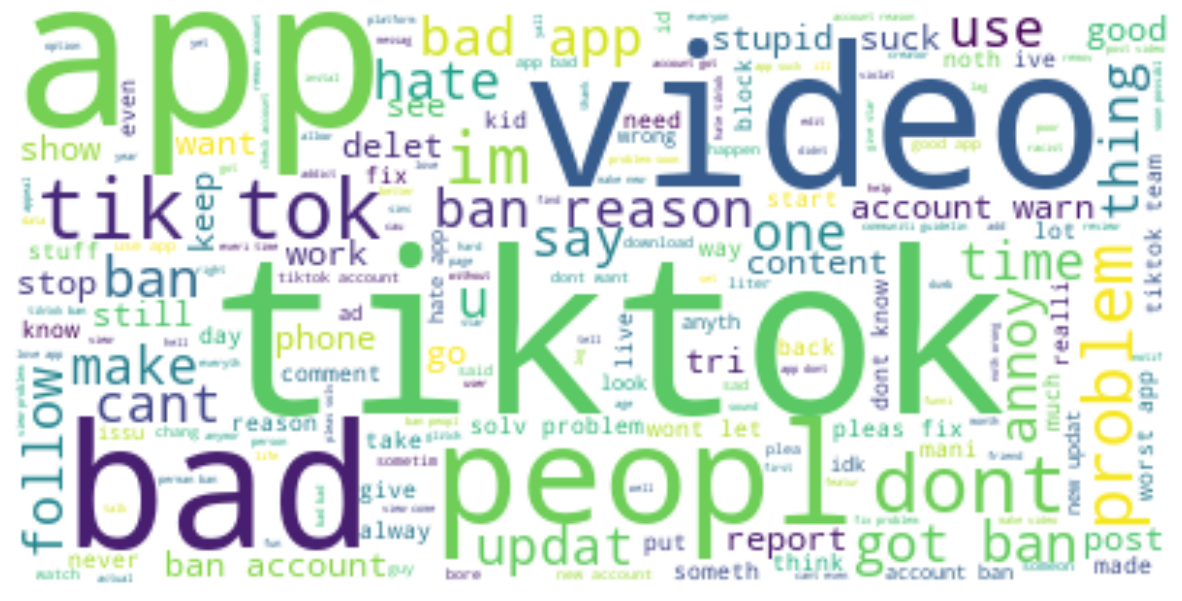

In [23]:
# Words people use in the negative reviews of TikTok

negative =' '.join([i for i in df['content'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Most common words used in negative reviews:
negative_words = [word for word in negative.lower().split() if word not in stopwords.words("english") and word.isalpha()]

most_common_words = Counter(negative_words).most_common(10)

print("Most common words used in negative reviews:")
for word, count in most_common_words:
    print(f"{word.capitalize()}: {count}")

Most common words used in negative reviews:
App: 12253
Account: 8309
Tiktok: 8130
Ban: 7393
Video: 6722
Bad: 5073
Get: 4931
Dont: 4613
Like: 4167
Problem: 4093


# Summary

Based on the analysis of the Tiktok reviews dataset from Google Play Store, it can be concluded that the majority of the reviews are positive. About 80% of the users gave a rating of equal or greater than 4 stars, indicating a high level of satisfaction with the app.

In the positive reviews, the most common words used were "App", "Good", "Love", "Nice", and "Tiktok", indicating that users appreciate the overall functionality, quality, and entertainment value of the app.

On the other hand, the most common words used in negative reviews were "App", "Account", "Tiktok", "Ban", and "Video".